In [3]:
# カレントディレクトリの変更

import os

os.chdir('/content/')

# カレントディレクトリの取得
print(os.getcwd())

/content


In [0]:
pwd

'/content'

In [0]:
mkdir sprint17

In [0]:
mv /content/drive/'My Drive'/'Colab Notebooks'/sprint17-work1.ipynb /content/drive/'My Drive'/sprint17/

In [1]:
# 自分のマイドライブにマウントする

from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
!pip install kaggle

In [0]:
mkdir .kaggle

In [0]:
ls -a

./  ../  .config/  drive/  .kaggle/  sample_data/


In [0]:
import json

token = {"username":"yukishibata","key":"06459ba3b14c8a1d45cf72f6ec04922d"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [0]:
!chmod 600 /content/.kaggle/kaggle.json

In [0]:
pwd

'/content'

In [0]:
ls -a .kaggle

./  ../  kaggle.json


In [0]:
mkdir　/root/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle/’: File exists


In [0]:
!cp -R /content/.kaggle/kaggle.json /root/.kaggle/

In [0]:
!ls -a /root/.kaggle/

.  ..  kaggle.json


In [0]:
# カレントディレクトリの変更

os.chdir('/content/drive/My Drive')

# カレントディレクトリの取得
print(os.getcwd())

/content/drive/My Drive


# 【問題1】自作データセットでの分類の学習
自作のデータセットに対して分類問題を解いてください。任意の実装を使用してください。

In [0]:
# kaggleのコンペから犬猫の画像をダウンロード
# https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition/data
!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

  0% 0.00/111k [00:00<?, ?B/s]
100% 111k/111k [00:00<00:00, 17.2MB/s]
 98% 267M/271M [00:03<00:00, 82.4MB/s]
100% 271M/271M [00:04<00:00, 70.7MB/s]
100% 544M/544M [00:05<00:00, 105MB/s] 



In [0]:
!unzip /content/drive/'My Drive'/train.zip  -d sprint17/

ストリーミング出力は最後の 5000 行に切り捨てられました。
  inflating: sprint17/train/dog.55.jpg  
  inflating: sprint17/train/dog.550.jpg  
  inflating: sprint17/train/dog.5500.jpg  
  inflating: sprint17/train/dog.5501.jpg  
  inflating: sprint17/train/dog.5502.jpg  
  inflating: sprint17/train/dog.5503.jpg  
  inflating: sprint17/train/dog.5504.jpg  
  inflating: sprint17/train/dog.5505.jpg  
  inflating: sprint17/train/dog.5506.jpg  
  inflating: sprint17/train/dog.5507.jpg  
  inflating: sprint17/train/dog.5508.jpg  
  inflating: sprint17/train/dog.5509.jpg  
  inflating: sprint17/train/dog.551.jpg  
  inflating: sprint17/train/dog.5510.jpg  
  inflating: sprint17/train/dog.5511.jpg  
  inflating: sprint17/train/dog.5512.jpg  
  inflating: sprint17/train/dog.5513.jpg  
  inflating: sprint17/train/dog.5514.jpg  
  inflating: sprint17/train/dog.5515.jpg  
  inflating: sprint17/train/dog.5516.jpg  
  inflating: sprint17/train/dog.5517.jpg  
  inflating: sprint17/train/dog.5518.jpg  
  inflating: sprint17/trai

In [0]:
rm test.zip

In [0]:
rm sample_submission.csv

In [0]:
rm train.zip

In [0]:
os.chdir('/content/drive/My Drive/sprint17/')

In [0]:
# train用
mkdir mini_train

In [0]:
cp /content/drive/'My Drive'/sprint17/train/cat.10000.jpg /content/drive/'My Drive'/sprint17/mini_train/

In [0]:
cp ./train/cat.10001.jpg ./mini_train/

In [0]:
cp ./train/cat.10002.jpg ./mini_train/

In [0]:
cp ./train/cat.10003.jpg ./mini_train/

In [0]:
cp ./train/cat.10004.jpg ./mini_train/

In [0]:
cp ./train/dog.10000.jpg ./mini_train/

In [0]:
cp ./train/dog.10001.jpg ./mini_train/

In [0]:
cp ./train/dog.10002.jpg ./mini_train/

In [0]:
cp ./train/dog.10003.jpg ./mini_train/

In [0]:
cp ./train/dog.10004.jpg ./mini_train/

In [0]:
# test用
mkdir mini_test

In [0]:
cp ./train/cat.10005.jpg ./mini_test/

In [0]:
cp ./train/cat.10006.jpg ./mini_test/

In [0]:
cp ./train/cat.10007.jpg ./mini_test/

In [0]:
cp ./train/cat.10008.jpg ./mini_test/

In [0]:
cp ./train/cat.10009.jpg ./mini_test/

In [0]:
cp ./train/dog.10005.jpg ./mini_test/

In [0]:
cp ./train/dog.10006.jpg ./mini_test/

In [0]:
cp ./train/dog.10007.jpg ./mini_test/

In [0]:
cp ./train/dog.10008.jpg ./mini_test/

In [0]:
cp ./train/dog.10009.jpg ./mini_test/

In [4]:
import os
from PIL import Image
import numpy  as np
import tensorflow as tf
import keras
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
# リスト化
# train
path = './mini_train' 
flist_train = sorted(os.listdir(path))

# test
path = './mini_test' 
flist_test = sorted(os.listdir(path))
print(flist_train)
print(flist_test)

['cat.10000.jpg', 'cat.10001.jpg', 'cat.10002.jpg', 'cat.10003.jpg', 'cat.10004.jpg', 'dog.10000.jpg', 'dog.10001.jpg', 'dog.10002.jpg', 'dog.10003.jpg', 'dog.10004.jpg']
['cat.10005.jpg', 'cat.10006.jpg', 'cat.10007.jpg', 'cat.10008.jpg', 'cat.10009.jpg', 'dog.10005.jpg', 'dog.10006.jpg', 'dog.10007.jpg', 'dog.10008.jpg', 'dog.10009.jpg']


(359, 431, 3)


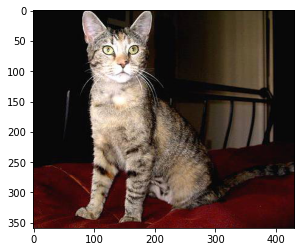

In [0]:
# shape確認
img = Image.open('./mini_train/' + flist_train[0])
img = np.array(img)
print(img.shape)

plt.imshow(img)
plt.show()

(224, 224, 3)


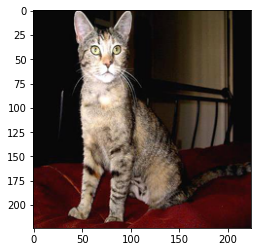

In [0]:
# resize確認
img = Image.open('./mini_train/' + flist_train[0]).resize((224, 224))
img = np.array(img)
print(img.shape)

plt.imshow(img)
plt.show()

In [0]:
# 全部resize
# train
img_train = np.empty((0,224,224,3))
img_test = np.empty((0,224,224,3))
for img in flist_train:
  img = Image.open('./mini_train/' + img).resize((224, 224))
  img = (np.array(img)/255).reshape((1,224,224,3))
  img_train = np.concatenate([img_train, img], axis = 0)
  # test
for img in flist_test:
  img = Image.open('./mini_test/' + img).resize((224, 224))
  img = (np.array(img)/255).reshape((1,224,224,3))
  img_test = np.concatenate([img_test, img], axis = 0)

In [0]:
# target作成(猫：０、犬：１)
y_train = np.array([0,0,0,0,0,1,1,1,1,1]).reshape((10,1)).astype(np.int)
y_test = np.array([0,0,0,0,0,1,1,1,1,1]).reshape((10,1)).astype(np.int)

In [0]:
K.clear_session( )
# ハイパーパラメータの設定
learning_rate = 1e-7
num_epochs = 100
NH_in = img_train.shape[1]
NW_in = img_train.shape[2]
C_in = img_train.shape[3]
n_samples = img_train.shape[0]
n_classes = 1

# モデル
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu", strides=1,
                           padding='same', input_shape=(NH_in, NW_in, C_in, ), kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation = "relu", strides=1,
                           padding='same', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=2, padding='valid', strides=2,),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation = "relu", strides=1,
                           padding='same', kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation = "relu", strides=1,
                           padding='same', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=2, padding='valid', strides=2,),
    tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation = "relu", strides=1,
                           padding='same', kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation = "relu", strides=1,
                           padding='same', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=2, padding='valid', strides=2,),
    tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation = "relu", strides=1,
                           padding='same', kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation = "relu", strides=1,
                           padding='same', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=2, padding='valid', strides=2,),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu", kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(n_classes, activation="sigmoid")
])
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              metrics=['accuracy', 'binary_accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
batch_normalization_1 (Batch (None, 112, 112, 128)     5

In [0]:
history = model.fit(img_train, y_train,
                    epochs=num_epochs,
                    batch_size=1,
                    verbose=1)
# test
score = model.evaluate(img_test, y_test, verbose=0)
print('test loss:', score[0])
print('test accuracy:', score[1])

Train on 10 samples
Epoch 1/100
10/10 [==============================] - 0s 46ms/sample - loss: 2.1655 - acc: 0.5000 - binary_accuracy: 0.5000
Epoch 2/100
10/10 [==============================] - 0s 16ms/sample - loss: 1.6237 - acc: 0.6000 - binary_accuracy: 0.6000
Epoch 3/100
10/10 [==============================] - 0s 16ms/sample - loss: 0.7109 - acc: 0.6000 - binary_accuracy: 0.6000
Epoch 4/100
10/10 [==============================] - 0s 16ms/sample - loss: 1.1857 - acc: 0.7000 - binary_accuracy: 0.7000
Epoch 5/100
10/10 [==============================] - 0s 15ms/sample - loss: 1.3162 - acc: 0.6000 - binary_accuracy: 0.6000
Epoch 6/100
10/10 [==============================] - 0s 16ms/sample - loss: 0.8216 - acc: 0.7000 - binary_accuracy: 0.7000
Epoch 7/100
10/10 [==============================] - 0s 16ms/sample - loss: 0.8644 - acc: 0.5000 - binary_accuracy: 0.5000
Epoch 8/100
10/10 [==============================] - 0s 16ms/sample - loss: 1.2515 - acc: 0.6000 - binary_accuracy: 0.6

# 【問題2】分類データセットに対するデータ拡張

In [0]:
# albumentations_examples
# https://qiita.com/Takayoshi_Makabe/items/79c8a5ba692aa94043f7
pip install albumentations

     |████████████████████████████████| 634kB 4.9MB/s 
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654020 sha256=5720304b20996924965e84348f171d627f889efb926fa2bd9b3283865476e551
  Stored in directory: /root/.cache/pip/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9


In [0]:
import cv2
from albumentations import (
    HorizontalFlip, VerticalFlip, RandomRotate90, ElasticTransform, 
    GridDistortion, OpticalDistortion, Blur, ChannelShuffle, ToGray, RGBShift, OneOf
)

In [0]:
# augmentationのリスト
train_transform = [
  HorizontalFlip(p=1),
  VerticalFlip(p=1),
  RandomRotate90(p=1),
  ElasticTransform(p=1, alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03),
  GridDistortion(p=1),
  OpticalDistortion(p=1, distort_limit=1, shift_limit=0.5),
  Blur(blur_limit=21, p=1),
  ChannelShuffle(p=1),
  ToGray(p=1),
  RGBShift(p=1)
]

In [0]:
# augmentationの実行

img_trans_train = np.empty((0,224,224,3))
trans_num = len(train_transform)
y_trans_train = np.empty((len(flist_train)*trans_num, 1))
# train augmentation
for i, origin_name in enumerate(flist_train):
  for n in range(trans_num):
    # yの作成
    if 'cat' in origin_name:
      y_trans_train[trans_num*i + n] = 0
    else:
      y_trans_train[trans_num*i + n] = 1
    # augmentation
    origin_img = Image.open('./mini_train/' + origin_name).resize((224, 224))
    img = np.array(origin_img).copy()
    img = train_transform[n](image=img)['image']
    img = (np.array(img)/255).reshape((1,224,224,3))
    img_trans_train = np.concatenate([img_trans_train, img], axis = 0)
y_trans_train = y_trans_train.astype(np.int)

In [0]:
print(img_trans_train.shape)
print(y_trans_train.shape)

(100, 224, 224, 3)
(100, 1)


In [0]:
K.clear_session( )
# ハイパーパラメータの設定(learning_rate調整)
# 汎化性をあげる構造（色々試したがコラが単純、かつ早くて良い精度）
learning_rate = 1e-7
num_epochs = 50
NH_in = img_trans_train.shape[1]
NW_in = img_trans_train.shape[2]
C_in = img_trans_train.shape[3]
n_samples = img_trans_train.shape[0]
n_classes = 1

# モデル
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu", strides=1,
                           padding='same', input_shape=(NH_in, NW_in, C_in, ), kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation = "relu", strides=1,
                           padding='same', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=2, padding='valid', strides=2,),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation = "relu", strides=1,
                           padding='same', kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation = "relu", strides=1,
                           padding='same', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=2, padding='valid', strides=2,),
    tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation = "relu", strides=1,
                           padding='same', kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation = "relu", strides=1,
                           padding='same', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=2, padding='valid', strides=2,),
    tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation = "relu", strides=1,
                           padding='same', kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation = "relu", strides=1,
                           padding='same', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=2, padding='valid', strides=2,),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu", kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(n_classes, activation="sigmoid")
])
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              metrics=['accuracy', 'binary_accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
batch_normalization_1 (Batch (None, 112, 112, 128)     5

In [0]:
# 学習, 手持ちtest
history = model.fit(img_trans_train, y_trans_train,
                    epochs=num_epochs,
                    batch_size=1,
                    verbose=1)
# test
score = model.evaluate(img_test, y_test, verbose=0)
print('test loss:', score[0])
print('test accuracy:', score[1])

Train on 100 samples
Epoch 1/50
100/100 [==============================] - 2s 19ms/sample - loss: 1.5134 - acc: 0.4300 - binary_accuracy: 0.4300
Epoch 2/50
100/100 [==============================] - 2s 15ms/sample - loss: 1.5441 - acc: 0.5000 - binary_accuracy: 0.5000
Epoch 3/50
100/100 [==============================] - 2s 15ms/sample - loss: 1.2773 - acc: 0.4700 - binary_accuracy: 0.4700
Epoch 4/50
100/100 [==============================] - 2s 15ms/sample - loss: 1.0451 - acc: 0.6000 - binary_accuracy: 0.6000
Epoch 5/50
100/100 [==============================] - 2s 15ms/sample - loss: 1.2848 - acc: 0.5500 - binary_accuracy: 0.5500
Epoch 6/50
100/100 [==============================] - 2s 15ms/sample - loss: 0.9714 - acc: 0.5800 - binary_accuracy: 0.5800
Epoch 7/50
100/100 [==============================] - 2s 15ms/sample - loss: 0.8439 - acc: 0.6200 - binary_accuracy: 0.6200
Epoch 8/50
100/100 [==============================] - 2s 15ms/sample - loss: 0.8089 - acc: 0.6800 - binary_accu

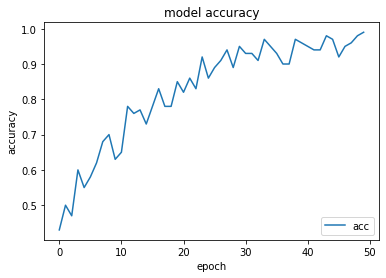

In [0]:
# 精度の履歴をプロット
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['acc'], loc='lower right')
plt.show()

In [0]:
pwd

'/content/drive/My Drive/sprint17'

In [0]:
# 遠藤さんtest
path2 = './test2' 
flist_test2 = sorted(os.listdir(path2))

# 全部resize
img_test2 = np.empty((0,224,224,3))
for img2 in flist_test2:
  img2 = Image.open('./test2/' + img2).resize((224, 224))
  img2 = (np.array(img2)/255)[:,:,:3].reshape((1,224,224,3))
  img_test2 = np.concatenate([img_test2, img2], axis = 0)

y_test2 = np.array([0,0,0,0,1,1,1,1]).reshape((8,1)).astype(np.int)
# pred
score = model.evaluate(img_test2, y_test2, verbose=0)
print('test loss:', score[0])
print('test accuracy:', score[1])

test loss: 0.7213222980499268
test accuracy: 0.625


# 【問題3】物体検出データセットの用意
次に、物体検出を行います。バウンディングボックスのアノテーションを行い物体検出のためのデータセットを作成してください。


《アノテーションのためのツール》


アノテーションツールにはLabelImgなどがあります。

# 【問題4】物体検出データセットに対するデータ拡張
データ拡張（Data Augmentation）を行ってください。前述のalbumentationsはバウンディングボックスを合わせての加工が可能です。詳細はREADME.mdを確認してください。

In [0]:
!mkdir train_aug

In [0]:
# albumentations_examples/notebooks/example_bboxes.ipynb
!git clone https://github.com/albumentations-team/albumentations_examples

Cloning into 'albumentations_examples'...
remote: Enumerating objects: 112, done.
remote: Counting objects: 100% (112/112), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 112 (delta 45), reused 111 (delta 44), pack-reused 0
Receiving objects: 100% (112/112), 35.89 MiB | 8.85 MiB/s, done.
Resolving deltas: 100% (45/45), done.
Checking out files: 100% (93/93), done.


In [5]:
os.chdir('/content/drive/My Drive/sprint17/albumentations_examples/notebooks')
print(os.getcwd())

/content/drive/My Drive/sprint17/albumentations_examples/notebooks


In [0]:
!python example_bboxes.ipynb

In [14]:
pwd

'/content/drive/My Drive/sprint17/albumentations_examples/notebooks'

In [6]:
# 外部からipynbを動かす　→　画像が出力されない

# !jupyter nbconvert example_bboxes.ipynb --to python
# !python example_bboxes.py

ERROR! Session/line number was not unique in database. History logging moved to new session 59
[NbConvertApp] Converting notebook example_bboxes.ipynb to python
[NbConvertApp] Writing 5627 bytes to example_bboxes.py


In [11]:
!pip install -U albumentations

     |████████████████████████████████| 122kB 3.4MB/s 
     |████████████████████████████████| 634kB 10.6MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.5-cp36-none-any.whl size=64378 sha256=6a12da21538bbfe224f402f90d71083c5fc2a16309f43628cad731691c53f572
  Stored in directory: /root/.cache/pip/wheels/f0/a0/61/e50f93165a5ec7e7f5d65064e513239505bc4c06d2289557d3
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654020 sha256=472e6ee8d55d5355994ee6ddd001dee28391191828dffc4da69d770eb2c325f3
  Stored in directory: /root/.cache/pip/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built albumentations imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [0]:
%matplotlib inline
from urllib.request import urlopen
import os

from PIL import Image
import numpy as np
import cv2
from matplotlib import pyplot as plt

from albumentations import (
    BboxParams,
    HorizontalFlip,
    VerticalFlip,
    Resize,
    CenterCrop,
    RandomCrop,
    Crop,
    Compose
)

In [0]:
def download_image(url):
    data = urlopen(url).read()
    data = np.frombuffer(data, np.uint8)
    image = cv2.imdecode(data, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [0]:
# 座標修正、rectangle引数の書き方修正

# Functions to visualize bounding boxes and class labels on an image. 
# Based on https://github.com/facebookresearch/Detectron/blob/master/detectron/utils/vis.py
BOX_COLOR = (255, 0, 0)
TEXT_COLOR = (255, 255, 255)

def visualize_bbox(img, bbox, class_id, class_idx_to_name, color=BOX_COLOR, thickness=2):
    x_min, y_min, x_max, y_max = bbox
    x_min, y_min, x_max, y_max = int(x_min), int(y_min), int(x_max), int(y_max)
    # x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color, thickness)
    class_name = class_idx_to_name[class_id]
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(img, class_name, (x_min, y_min - int(0.3 * text_height)), cv2.FONT_HERSHEY_SIMPLEX, 0.35,TEXT_COLOR, lineType=cv2.LINE_AA)
    return img


def visualize(annotations, category_id_to_name):
    img = annotations['image'].copy()
    for idx, bbox in enumerate(annotations['bboxes']):
        img = visualize_bbox(img, bbox, annotations['category_id'][idx], category_id_to_name)
    plt.figure(figsize=(12, 12))
    plt.imshow(img)

In [0]:
# formatをpascal_vocに変更
def get_aug(aug, min_area=0., min_visibility=0.):
    return Compose(aug, bbox_params=BboxParams(format='pascal_voc', min_area=min_area, 
                                               min_visibility=min_visibility, label_fields=['category_id']))


In [0]:
# imageのパス修正
path = '/content/drive/My Drive/sprint17/train_aug/'
flist_train = sorted(os.listdir(path))
image = Image.open('/content/drive/My Drive/sprint17/train_aug/' + flist_train[0])
image = np.array(image)
# image = download_image('http://images.cocodataset.org/train2017/000000386298.jpg')

In [0]:
# ボックスの座標、name修正
## Annotations for image 386298 from COCO http://cocodataset.org/#explore?id=386298
annotations = {'image': image, 'bboxes': [[69, 10, 310, 350]], 'category_id': [0]}
category_id_to_name = {0: 'cat', 1: 'dog'}

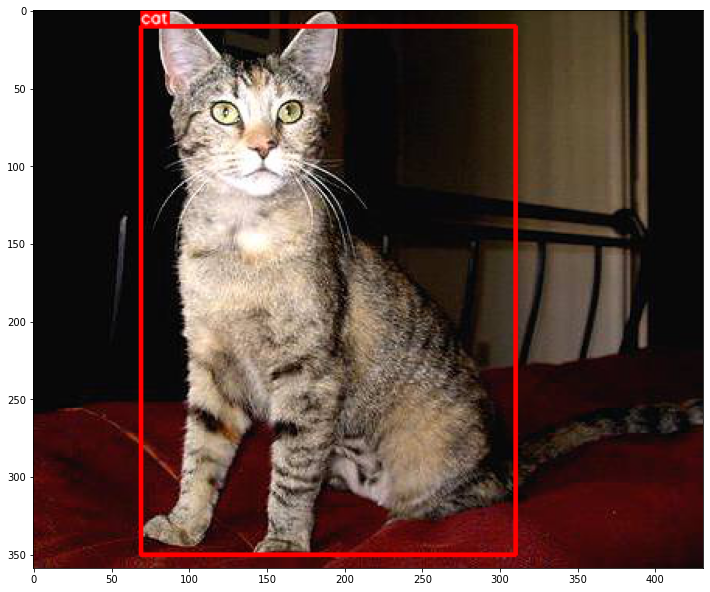

In [21]:
visualize(annotations, category_id_to_name)

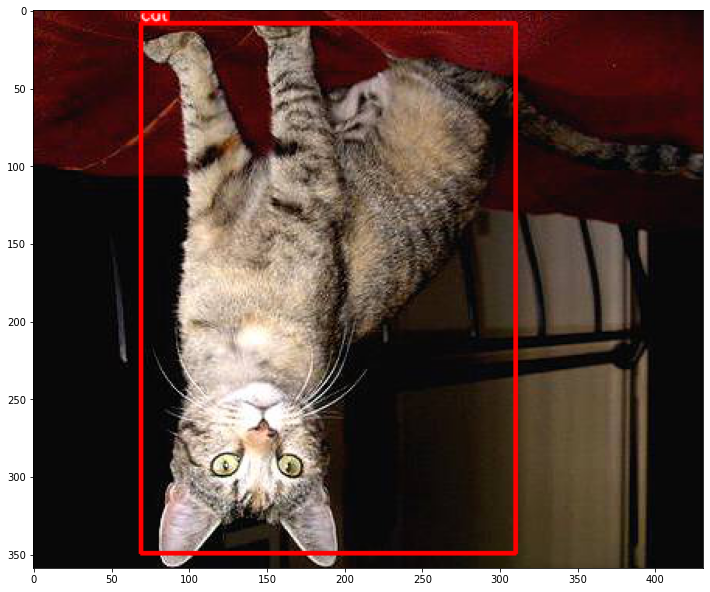

In [22]:
aug = get_aug([VerticalFlip(p=1)])
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)

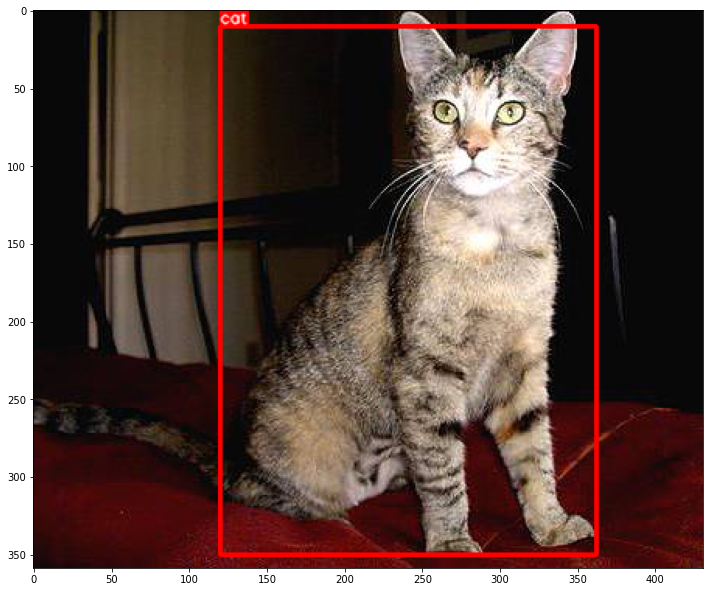

In [23]:
aug = get_aug([HorizontalFlip(p=1)])
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)

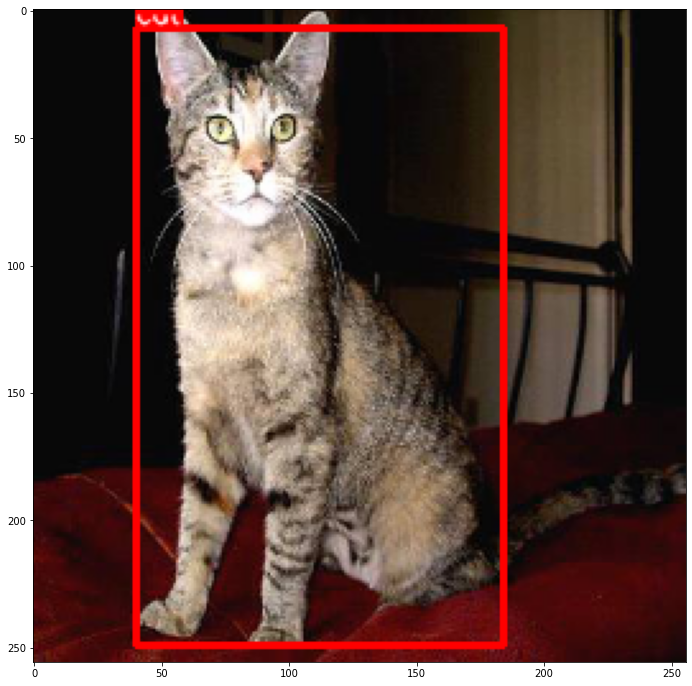

In [24]:
aug = get_aug([Resize(p=1, height=256, width=256)])
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)

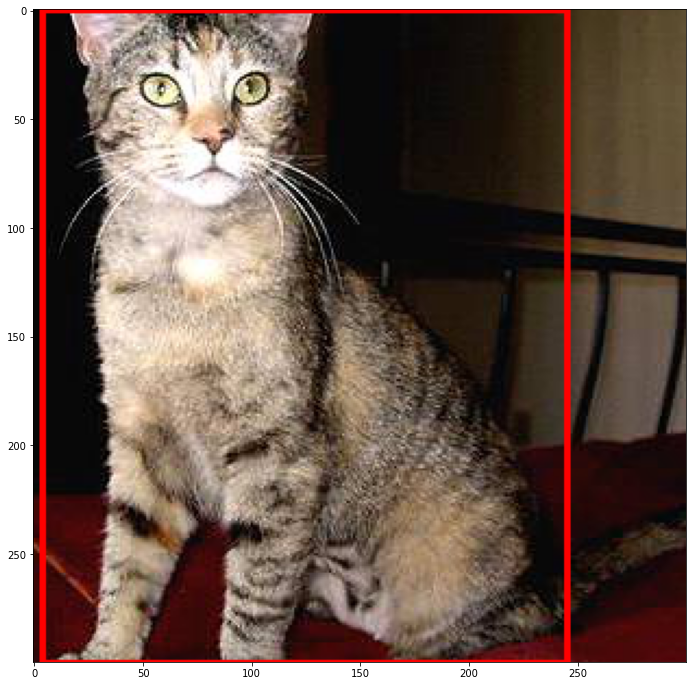

In [25]:
aug = get_aug([CenterCrop(p=1, height=300, width=300)])
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)

[0]


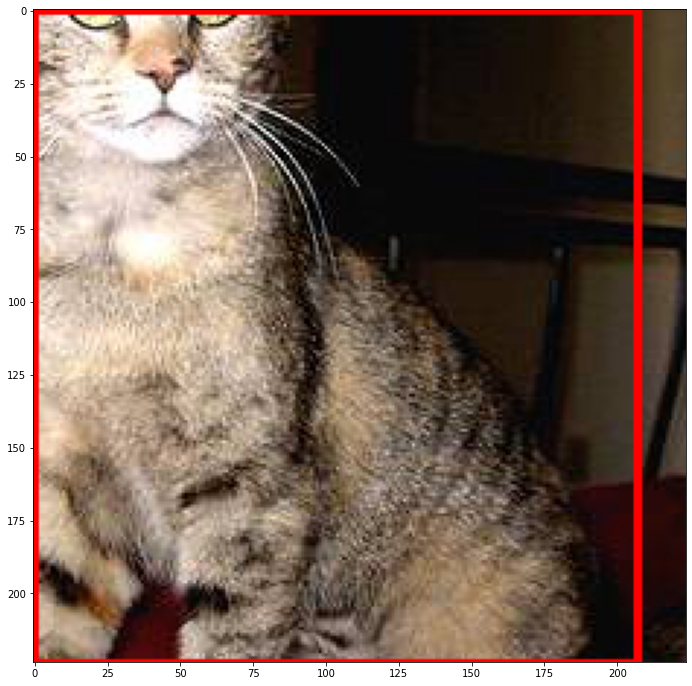

In [26]:
aug = get_aug([CenterCrop(p=1, height=224, width=224)])
augmented = aug(**annotations)
print(augmented['category_id'])
visualize(augmented, category_id_to_name)

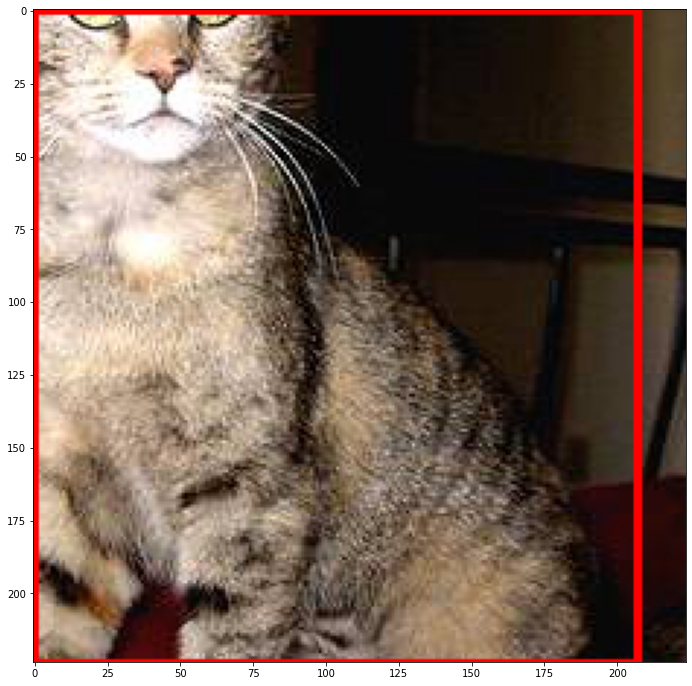

In [27]:
aug = get_aug([CenterCrop(p=1, height=224, width=224)], min_area=4000)
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)

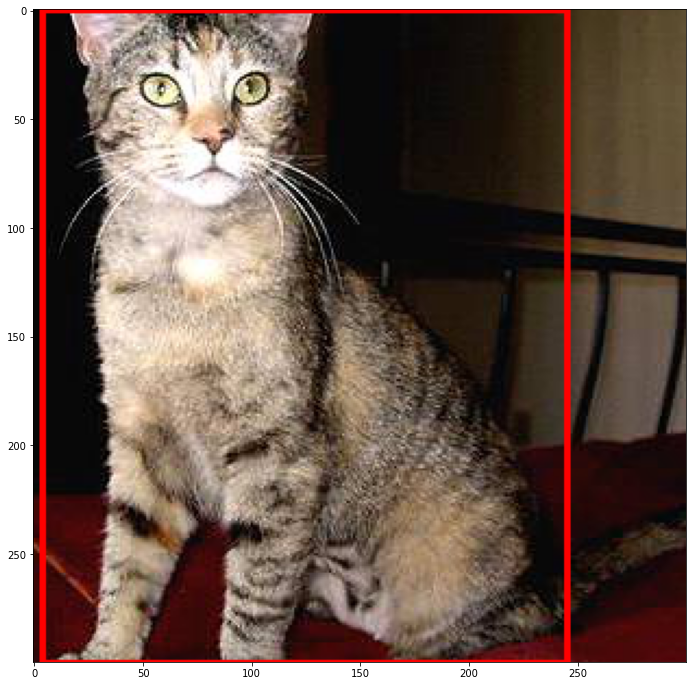

In [28]:
aug = get_aug([CenterCrop(p=1, height=300, width=300)], min_visibility=0.3)
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)